# Basics of fMRI data handling and plotting

This example shows the basics of how to download, load, manipulate and plot typical functional MRI data using Python libraries.

## Imports

In [2]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
# from niwidgets import NiftiWidget

## Locate data

In [3]:
sub_dir = '/Volumes/Stephan_WD/NEUFEPME_data_BIDS/derivatives/fmrwhy-preproc/sub-001'
# /Volumes/Stephan_WD/NEUFEPME_data_BIDS/derivatives/fmrwhy-preproc/sub-001/func/sub-001_task-rest_run-1_space-individual_bold.nii

func_niiz = os.path.join(sub_dir, 'func', 'sub-001_task-rest_run-1_space-individual_bold.nii') 
struct_niiz = os.path.join(sub_dir, 'anat', 'sub-001_T1w.nii') 

## Load structural image data and display header information

In [4]:
struct_img = nib.load(struct_niiz)
# print(struct_img.affine.shape)
struct_data = struct_img.get_fdata()
print('Structural image dimensions: {}'.format(struct_img.shape))
struct_hdr = struct_img.header
print('Structural image header:\n{}'.format(struct_hdr))

Structural image dimensions: (240, 240, 180)
Structural image header:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 240 240 180   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 179
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Philips Medical Systems Achieva 5.1.7 '
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : -0.47371885
quatern_c       : 0.5174563
quatern_d       : -0.

## Plot T1-weighted structural image

/Users/jheunis/miniconda3/envs/rtfmri-dev/lib/python3.7/site-packages/niwidgets/niwidget_volume.py:197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  else np.fliplr(np.flipud(np.rot90(data[slice_obj], k=1)))
/Users/jheunis/miniconda3/envs/rtfmri-dev/lib/python3.7/site-packages/niwidgets/niwidget_volume.py:196: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if views[ii] != "Sagittal"


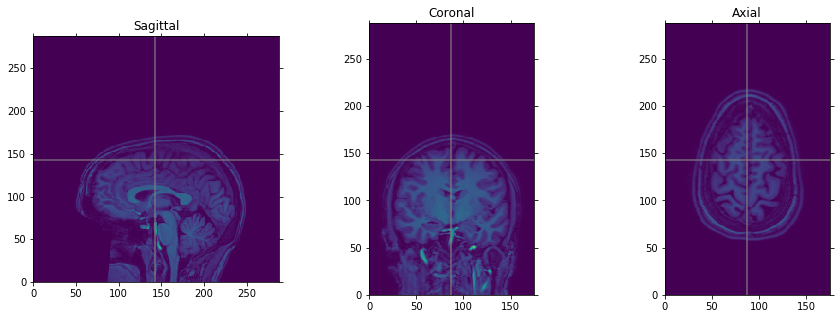

In [12]:
my_widget = NiftiWidget(struct_niiz)
my_widget.nifti_plotter()

## Load functional time series data and display header information

In [5]:
func_img = nib.load(func_niiz)
data = func_img.get_fdata()
hdr = func_img.header
print('Functional image dimensions: {}'.format(func_img.shape))
hdr = func_img.header
print('Functional image header:\n{}'.format(hdr))

Functional image dimensions: (64, 64, 34)
Functional image header:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 64 64 34  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         3.4999998  3.5000002  3.4998145  2.0015311  0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Template functional volume'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.033247277
quatern_c     

In [8]:
np.set_printoptions(precision=2, suppress=True)
print(func_img.affine)
nib.aff2axcodes(func_img.affine)

[[  -3.49    0.23   -0.09  110.3 ]
 [   0.24    3.44   -0.57 -109.4 ]
 [  -0.05    0.58    3.45  -44.2 ]
 [   0.      0.      0.      1.  ]]


('L', 'A', 'S')

In [15]:
epi_img = func_img
epi_img_data = epi_img.get_fdata()
print(epi_img_data.shape)
print(nib.aff2axcodes(epi_img.affine))
anat_img = struct_img
anat_img_data = anat_img.get_fdata()
print(anat_img_data.shape)
print(nib.aff2axcodes(anat_img.affine))

(64, 64, 34)
('L', 'A', 'S')
(240, 240, 180)
('P', 'I', 'R')


Text(0.5, 0.98, 'Center slices for Anatomical image')

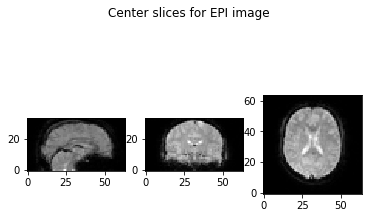

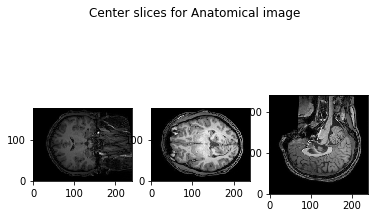

In [14]:
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
        
slice_0 = epi_img_data[32, :, :]
slice_1 = epi_img_data[:, 32, :]
slice_2 = epi_img_data[:, :, 17]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

slice_0 = anat_img_data[120, :, :]
slice_1 = anat_img_data[:, 120, :]
slice_2 = anat_img_data[:, :, 90]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for Anatomical image")  

In [16]:
hdr = func_img.header
raw = hdr.structarr
print('Header:\n{}'.format(hdr))
print('Raw header:\n{}'.format(raw))

Header:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 64 64 34  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   3.5  3.5  3.5  2.   0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Template functional volume'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.033247277
quatern_c       : 0.9959692
quatern_d       : 0.08265758
qoffset_x       : 110.304886
qoffset_y       : -109.40334


In [17]:
print('sform_code:\n{}'.format(hdr['sform_code']))

sform_code:
2
